<a href="https://colab.research.google.com/github/dil150898/daily-asignments/blob/main/Assignment_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <u> Use only those concepts which have been taught till now </u>

# <b><u> Problem 1: </u> Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor. </b>

In [96]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
file_path = ('/content/drive/MyDrive/Almabetter/Foundation track/Module 2/WEEK 2/DAY 2/imdb_data.csv')
imdb_df = pd.read_csv(file_path)

In [40]:
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [41]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [42]:
imdb_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [43]:
imdb_df.loc[0 , 'cast']

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

In [44]:
def convert_to_list(string):
  return eval(string)

In [45]:
imdb_df.loc[~imdb_df['cast'].isna() , 'cast'] = imdb_df.loc[~imdb_df['cast'].isna() , 'cast'].apply(convert_to_list)

In [46]:
type(imdb_df.loc[0 , 'cast'])

list

In [47]:
# Define a function to extract the name from the first dictionary
def extract_first_name(cast_list):
    if cast_list and isinstance(cast_list, list):
        first_dict = cast_list[0]
        if 'name' in first_dict:
            return first_dict['name']
    return None


In [48]:
imdb_df['Actor name'] = imdb_df['cast'].apply(extract_first_name)

In [49]:
null_actor_name = imdb_df[imdb_df['Actor name'] . isnull()]
null_actor_name.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,Actor name
233,234,NaN,0,"[{'id': 37, 'name': 'Western'}, {'id': 99, 'na...",NaN,tt1517252,en,Sweetgrass,"An unsentimental elegy to the American West, S...",0.492745,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Sweetgrass,"[{'id': 187056, 'name': 'woman director'}]",[],"[{'credit_id': '5479ab4e925141297e0022c5', 'de...",206728,None
518,519,"[{'id': 468552, 'name': 'Wonder Woman Collecti...",149000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.warnerbros.com/wonder-woman,tt0451279,en,Wonder Woman,An Amazon princess comes to the world of Man t...,294.337037,...,141.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Power. Grace. Wisdom. Wonder.,Wonder Woman,"[{'id': 849, 'name': 'dc comics'}, {'id': 1701...",NaN,NaN,820580447,None
680,681,NaN,125000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.thedayaftertomorrow.com/,tt0319262,en,The Day After Tomorrow,After years of increases in the greenhouse eff...,15.049695,...,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Where will you be?,The Day After Tomorrow,"[{'id': 83, 'name': 'saving the world'}, {'id'...",NaN,NaN,544272402,None
773,774,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0264802,en,Live Nude Girls Unite!,Documentary look at the 1996-97 effort of the ...,0.001272,...,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Nude Girls Unite!,"[{'id': 582, 'name': 'san francisco'}, {'id': ...",[],"[{'credit_id': '52fe4a249251416c750df26b', 'de...",48752,None
906,907,"[{'id': 263, 'name': 'The Dark Knight Collecti...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,tt1345836,en,The Dark Knight Rises,Following the death of District Attorney Harve...,20.582580,...,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",NaN,NaN,1084939099,None


In [50]:
actor_most_movies = imdb_df['Actor name'].value_counts()

In [51]:
#expore idxmax()

In [52]:
actor_most_movies = imdb_df['Actor name'].value_counts().reset_index()
actor_most_movies.columns = ['Actor name' , 'Nomber of movies']

In [59]:
actor_most_moviess = (f' The actor acted in most movies is "{actor_most_movies.loc[ 0 , "Actor name"]}". Worked in "{actor_most_movies.loc[ 0 , "Nomber of movies"]}" movies.')
print(actor_most_moviess)

 The actor acted in most movies is "Denzel Washington". Worked in "18" movies.


In [85]:
# original_title
imdb_df['profit'] = imdb_df['revenue'] - imdb_df['budget']
movie_name_genres = imdb_df.loc[imdb_df['Actor name'] == actor_most_movies.loc[0 , 'Actor name']][['original_title' , 'genres name' , 'profit']].reset_index()

movie_name_genres.drop('index' , axis = 1 , inplace = True)
movie_name_genres

,original_title,genres name,profit
0,Fallen,Thriller,25232289
1,Chasing Trane,Documentary,393970
2,The Hurricane,Drama,23956241
3,The Bone Collector,Drama,78493655
4,Crimson Tide,Action,104387195
5,The Manchurian Candidate,Drama,16105964
6,Virtuosity,Action,-5952000
7,Safe House,Action,123076205
8,The Great Debaters,Drama,15226144
9,The Mighty Quinn,Action,4557214


In [86]:
movie_name_genres[movie_name_genres['profit'] < 0 ]

,original_title,genres name,profit
6,Virtuosity,Action,-5952000
11,He Got Game,Drama,-3432147


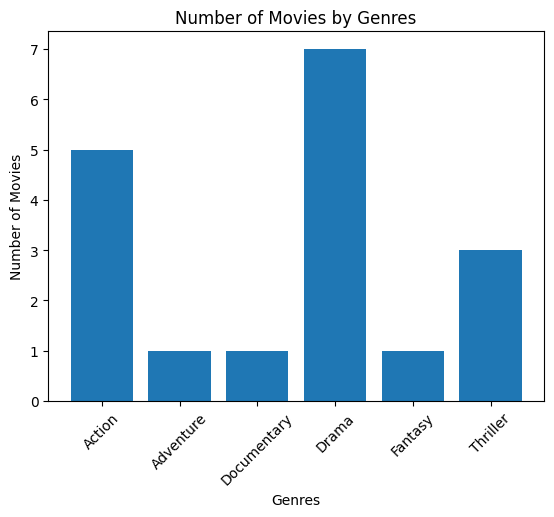

In [102]:
# Assuming 'genres name' is the column with genres
movie_name_genres_count = movie_name_genres.groupby('genres name').size().reset_index(name='count')
plt.bar(movie_name_genres_count['genres name'], movie_name_genres_count['count'])
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genres')
plt.xticks(rotation=45)
plt.show()

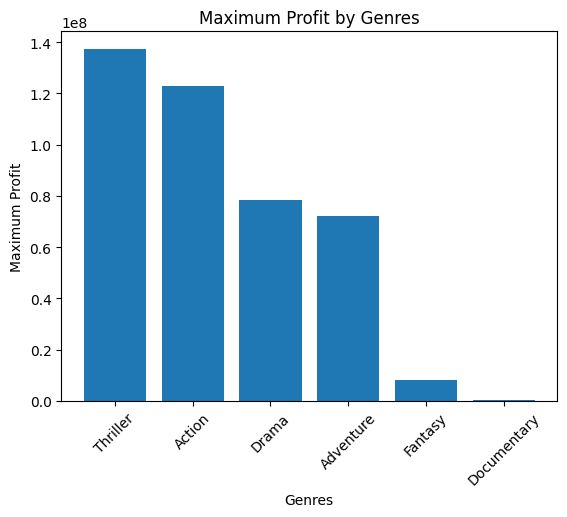

In [97]:
movie_max_profit = movie_name_genres.groupby('genres name')['profit'].max()
movie_max_profit_sorted = movie_max_profit.sort_values(ascending=False)
plt.bar(movie_max_profit_sorted.index, movie_max_profit_sorted.values)
plt.xlabel('Genres')
plt.ylabel('Maximum Profit')
plt.title('Maximum Profit by Genres')
plt.xticks(rotation=45)
plt.show()

# <b><u> Problem 2 :</u> Top 3 directors prefer which actors the most?

In [55]:
# Your code here




# <b><u>Problem 3 :</u> Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI.

In [56]:
# Hint below: Create a dataframe which looks like as shown
# DataFrame1
Movie    Producers     Directors

Movie1    [p1, p2]     [d1, d2]
Movie2    [p3, p4]     [d3, d4]

# DataFrame2
Movie    Producers       ROI
Movie1     p1            12
Movie1     p2            13
Movie2     p3            14
movie2     p4            15

# DataFrame3
Producer   Movies         Average_ROI
p1.    [m1, m2, m3]    avg_roi(m1, m2, m3)
p2     [m2, m4, m5]    avg_roi(m2, m4, m5)

SyntaxError: invalid syntax (<ipython-input-56-b6f6e8bd3813>, line 3)

In [ ]:
# Your code here



